<a href="https://colab.research.google.com/github/Sanmuga/Covid-analysis/blob/main/covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy

In [ ]:
pip install scikit-learn

In [ ]:
pip install tensorflow keras

In [ ]:
pip install tensorflow keras

In [ ]:
pip install matplotlib

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Step 1: Data Preprocessing
data = pd.read_csv('full_grouped.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# Feature Engineering
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [11]:
# Handle missing values
data.fillna(0, inplace=True)

In [12]:
# Encode categorical variables 'Country/Region' and 'WHO Region'
data = pd.get_dummies(data, columns=['Country/Region', 'WHO Region'])

In [13]:
# Step 2: Train-Test Split
X = data.drop(columns=['Confirmed', 'Date'])
y = data['Confirmed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [14]:
# Step 3: Build the TensorFlow Model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

In [15]:
# Step 4: Compile the Model
model.compile(optimizer='adam', loss='mse')

In [16]:
# Step 5: Model Training
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
220/220 [==============================] - 1s 2ms/step - loss: 4468344832.0000 - val_loss: 12636894.0000
Epoch 2/100
220/220 [==============================] - 1s 2ms/step - loss: 14053690.0000 - val_loss: 24612548.0000
Epoch 3/100
220/220 [==============================] - 1s 3ms/step - loss: 6515660.5000 - val_loss: 691972.7500
Epoch 4/100
220/220 [==============================] - 1s 3ms/step - loss: 605723.0625 - val_loss: 1340585.3750
Epoch 5/100
220/220 [==============================] - 1s 2ms/step - loss: 5733823.5000 - val_loss: 1055294.0000
Epoch 6/100
220/220 [==============================] - 0s 2ms/step - loss: 459631.7188 - val_loss: 106904.8438
Epoch 7/100
220/220 [==============================] - 0s 2ms/step - loss: 34630136.0000 - val_loss: 1734848.3750
Epoch 8/100
220/220 [==============================] - 0s 2ms/step - loss: 43716912.0000 - val_loss: 989537.5000
Epoch 9/100
220/220 [==============================] - 0s 2ms/step - loss: 1060009.6250 - val

In [17]:
# Step 6: Model Evaluation
y_pred = model.predict(X_test)

550/550 [==============================] - 1s 933us/step


In [18]:
# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 269970.1013355527


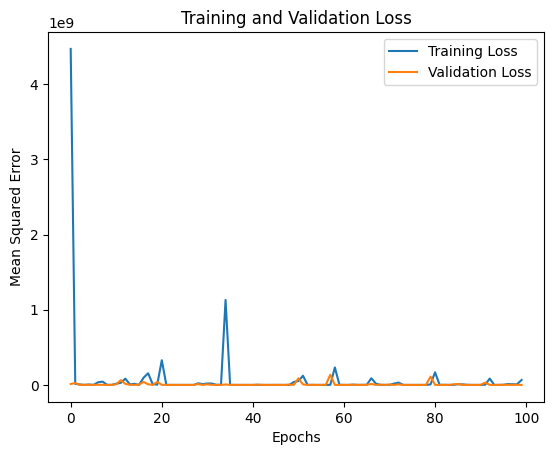

In [20]:
# Step 7: Data Visualization - Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

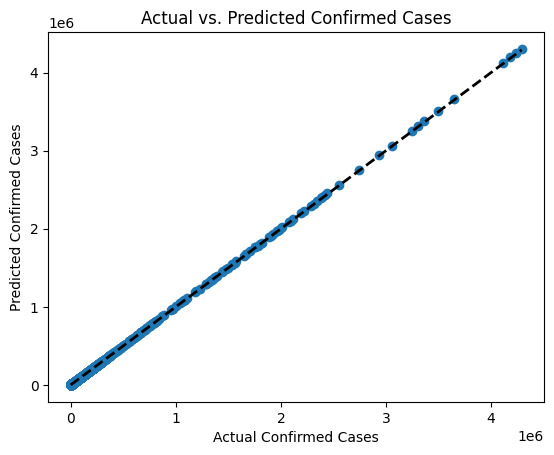

In [21]:
# Step 8: Data Visualization - Actual vs. Predicted Confirmed Cases
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Confirmed Cases')
plt.ylabel('Predicted Confirmed Cases')
plt.title('Actual vs. Predicted Confirmed Cases')
plt.show()

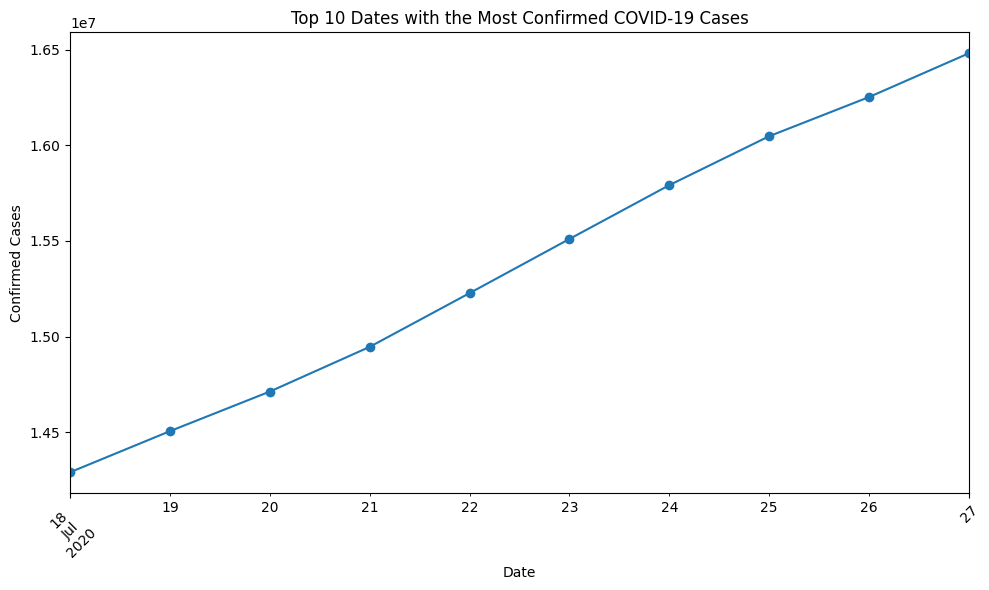

In [23]:
# Step 10: Data Visualization - Line Chart
plt.figure(figsize=(10, 6))
top_10_dates = data.groupby('Date')['Confirmed'].sum().sort_values(ascending=False).head(10)
top_10_dates.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Dates with the Most Confirmed COVID-19 Cases')
plt.xticks(rotation=45)
plt.tight_layout()

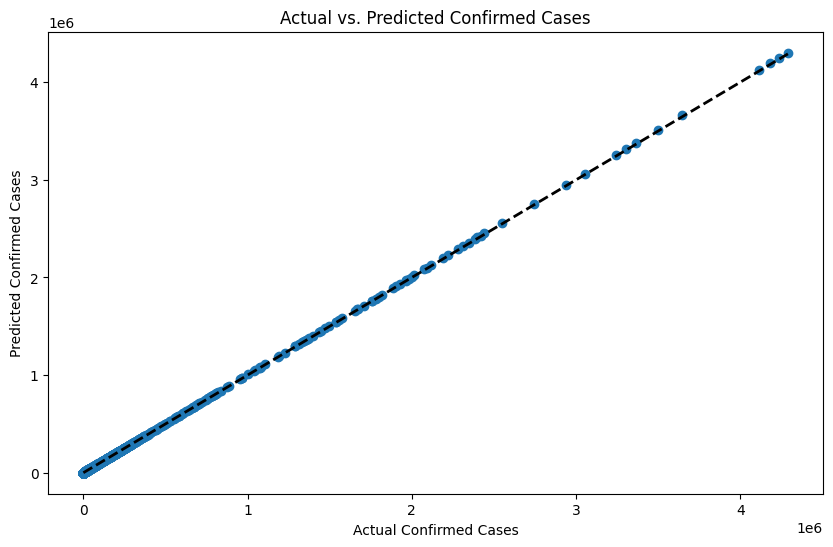

In [24]:
# Step 11: Data Visualization - Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Confirmed Cases')
plt.ylabel('Predicted Confirmed Cases')
plt.title('Actual vs. Predicted Confirmed Cases')
plt.show()